In [1]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
# Define the dataset:
# The data array must be a m x (n+1), where:
# m is the number of training examples
# n is the number features of the X vector from n=1 to n (does not count x0)
# the array's last column is the 'y' vector

data = np.genfromtxt('ex1data2.txt', delimiter=',')

In [3]:
# Extract parameters
m = data.shape[0] # number of training examples
n = data.shape[1]-1 # number of features 
y = data[:,-1].reshape(m,1) # y vector note that needs to be resphaped to mx1
x0 = np.ones((m,1)) # x0 vector, all ones
x = data[:,0:n] # Matrix X1 to Xn values matrix wihtout x0
X = np.c_[x0,x] # Maxtrix X
theta = np.zeros((n+1,1)) # theta initialised to zeroes

In [4]:
# Normalise x
def featureNorm (x):
    xmean = x.mean(0)
    xstd = x.std(0)
    xnorm = (x - xmean)/xstd
    return xnorm, xmean, xstd

x_norm = featureNorm(x)[0]
x_mean = featureNorm(x)[1]
x_std = featureNorm(x)[2]

X_norm = np.c_[x0,x_norm]



[[340080.2253366 ]
 [104612.95939416]
 [ -1743.5451211 ]]


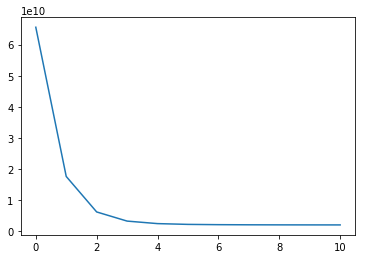

In [5]:
def J(X,theta,y):
    '''
    J is the cost function and returns the error of a given theta vector, for the training sample X and the observed values y
    '''
    m = X.shape[0] # the number of training examples
    um = np.ones((1,m)) # ones vector size m
    return (um @ ((X @ theta - y)**2))/(2*m)

def gDesc(X,theta,y,alpha,it):
    '''
    Gradient descent iterative funtions where alpha is the learning rate and it the number of iterations
    Returns a list where the first element is theta a the end of the interations proces and the second elemnt if the history of cost stored in an array
    '''
    m = X.shape[0] # the number of training examples
    c = J(X,theta,y) # the cost of the input theta, typically an zeroes initialised theta is provided
    for i in range(it):
        error = (X @ theta) - y
        errorsim = (X.conj().T) @ error
        errorsimalpham = alpha/m * errorsim
        theta = theta - errorsimalpham #the current iteration theta with simultaneous update
        c = np.r_[c,J(X,theta,y)] # The history of cost updated to the current theta stored in a vector
    return theta, c


it = 10# number of iterations
alpha = 0.5 # learning rate
theta = np.zeros((n+1,1)) # theta initialised to zeroes

results = gDesc(X_norm,theta,y,alpha,it)

theta = results[0]
cost = results[1]

print(theta)

plt.plot(cost)
plt.show()

In [6]:
# Predictions
x1 = 1650 # sq feet 
x2 = 3 # number of rooms

Xin = np.array(([x1,x2]))
Xin_norm = (Xin - x_mean)/ x_std
Xin_norm = np.r_[1,Xin_norm]
Xin_norm= Xin_norm.reshape(1,3)
Xin = np.r_[1,Xin]

yout= Xin_norm @ theta
yout

array([[293812.46107609]])

In [7]:
#Normal equations

In [8]:
ThetaNorm = linalg.pinv(X.conj().T @ X) @ X.conj().T @ y
ThetaNorm

array([[89597.90954433],
       [  139.21067402],
       [-8738.01911277]])

In [9]:
# Prediction:
Xin @ ThetaNorm

array([293081.46433506])